In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms,models

In [0]:
vgg = models.vgg19(pretrained = True).features

In [0]:
for layer in vgg.parameters():
  layer.requires_grad_(False)

In [0]:
def load(path,shape = None,maxm = 512):
  img = Image.open(path).convert('RGB')
  if max(img.size)>maxm:
    size = maxm
  else:
    size = max(img.size)
  if shape is not None:
    size = shape
  trans = transforms.Compose([transforms.Resize(size),
                              transforms.ToTensor(),
                              transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])
  image = trans(img)
  image = (image[:3,:,:].unsqueeze(0))

  return image

In [0]:
!wget https://github.com/udacity/deep-learning-v2-pytorch/raw/master/style-transfer/images/octopus.jpg
!wget https://github.com/udacity/deep-learning-v2-pytorch/raw/master/style-transfer/images/hockney.jpg

--2020-03-10 11:13:33--  https://github.com/udacity/deep-learning-v2-pytorch/raw/master/style-transfer/images/octopus.jpg
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/style-transfer/images/octopus.jpg [following]
--2020-03-10 11:13:33--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/style-transfer/images/octopus.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92235 (90K) [image/jpeg]
Saving to: ‘octopus.jpg.1’

octopus.jpg.1       100%[===================>]  90.07K  --.-KB/s    in 0.007s  

2020-03-10 11:13:33 (11.7 MB/s) - ‘o

In [0]:
C_img = load('octopus.jpg')
S_img = load('hockney.jpg',shape = C_img.shape[-2:])

In [0]:
torch.cuda.is_available()

True

In [0]:
dev = 'cuda' if torch.cuda.is_available() else 'cpu'

In [0]:
C_img = C_img.to(dev)
S_img = S_img.to(dev)

In [0]:
def tsr_to_arr(tensor):
  img = tensor.to('cpu').clone().detach()
  img = img.numpy().squeeze(0)
  img = img.transpose(1,2,0)
  img = img*np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
  img = img.clip(0,1)

  return img

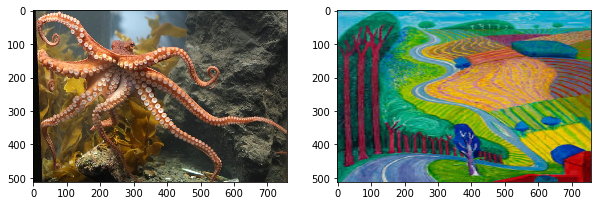

In [0]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(tsr_to_arr(C_img))
plt.subplot(1,2,2)
plt.imshow(tsr_to_arr(S_img))

In [0]:
vgg

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [0]:
vgg.to(dev)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [0]:
def feats(img,model):
  layers = {'0':'conv1_1',
            '5':'conv2_1',
            '10':'conv3_1',
            '19':'conv4_1',
            '21':'conv4_2',
            '28':'conv5_1'}
  features = {}
  x = img
  for name,lyr in model._modules.items():
    x = lyr(x)
    if name in layers:
      features[layers[name]] = x
  return features

In [0]:
def gram_mx(tsr):
  m,D,H,W = tsr.size()
  tsr = tsr.view(D,H*W)
  
  return torch.mm(tsr,tsr.t())

In [0]:
content_feats = feats(C_img,vgg)

In [0]:
style_feats = feats(S_img,vgg)

In [0]:
style_gram = {lyr: gram_mx(style_feats[lyr]) for lyr in style_feats}

In [0]:
gen = C_img.clone().requires_grad_(True).to(dev)

In [0]:
style_weights = {'conv1_1': 0.2,
                 'conv2_1': 0.2,
                 'conv3_1': 0.2,
                 'conv4_1': 0.2,
                 'conv5_1': 0.2}

In [0]:
a = 1
b = 10**3

In [0]:
opt = torch.optim.Adam([gen],0.1)

In [0]:
for e in range(2000):
  gen_feats = feats(gen,vgg)
  content_loss = torch.mean((gen_feats['conv4_2']-content_feats['conv4_2']))
  style_loss = 0
  for lyr in style_weights:
    #print(lyr)
    gen_feat = gen_feats[lyr]
    m,D,H,W = gen_feat.shape
    gen_gram = gram_mx(gen_feat)
    style_grams = style_gram[lyr]
    temp_loss = style_weights[lyr]*torch.mean((gen_gram-style_grams)**2)
    style_loss+=temp_loss/(D*H*W)
  total_loss = a*content_loss+b*style_loss

  opt.zero_grad()
  total_loss.backward()
  opt.step()

  if e%200 == 0:
    print('Total Loss: ',total_loss.item())
    plt.imshow(tsr_to_arr(gen))
    plt.show()

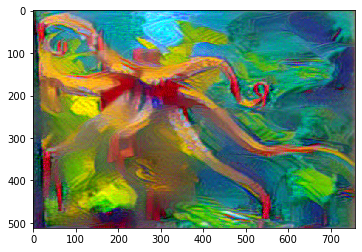

In [0]:
plt.imshow(tsr_to_arr(gen))